# Importing **Libraries**

In [1]:
import pandas as pd
import cv2 
import os
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import MaxPool2D, Conv2D, BatchNormalization, Dense, Flatten, Dropout

Using TensorFlow backend.


## Loading data

In [0]:
data = []
CATEGORIES = os.listdir()
IMG_SIZE = 50
for category in CATEGORIES:
  class_num = CATEGORIES.index(category)
  for img in os.listdir(category):
    img_array = cv2.imread(os.path.join(category,img), 0)
    new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
    data.append([new_array, class_num])


In [3]:
np.shape(data)

(11385, 2)

Separating features and labels

In [0]:
X = []
Y = []
for feature, labels in data:
  X.append(feature)
  Y.append(labels)

X = np.array(X)
X = X / 255
X = X.reshape(-1, IMG_SIZE,IMG_SIZE,1)

## Ploting some images

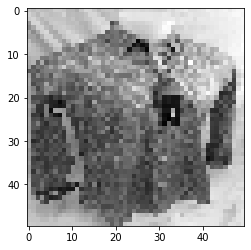

blue_shirt


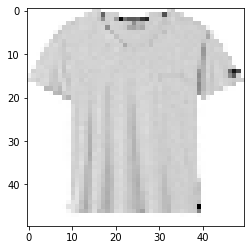

blue_shirt


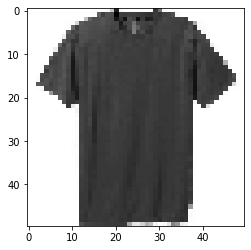

blue_shirt


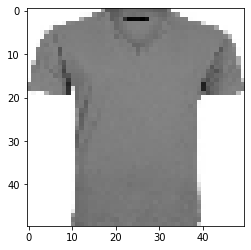

blue_shirt


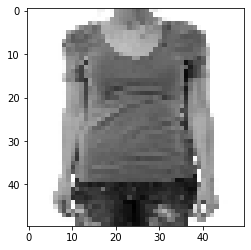

green_shirt


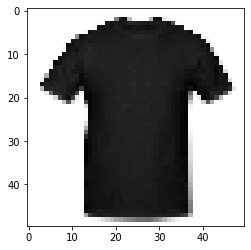

green_shirt


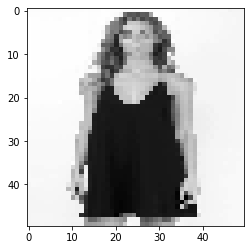

black_dress


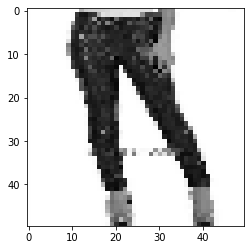

blue_pants


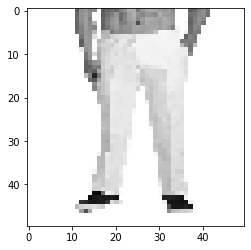

white_pants


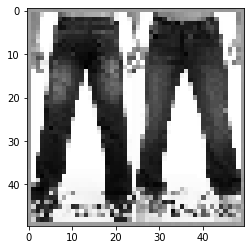

blue_pants


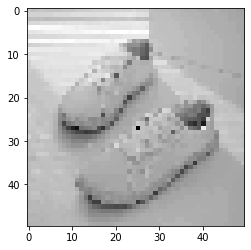

white_shoes


In [5]:
inde = [1, 21, 43, 324, 5343, 5342, 2333, 1222, 4567, 1235, 5674]
for index in inde:
    grid = X[index].reshape(IMG_SIZE,IMG_SIZE)
    plt.imshow(grid, cmap='gray')
    plt.show()
    print(CATEGORIES[Y[index]])


## Converting features to categorical value

In [0]:
Y = to_categorical(Y)

In [7]:
Y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

CNN

In [8]:
model = Sequential()
model.add(Conv2D(64, 3, data_format='channels_last', padding='same', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(32, 3, data_format='channels_last', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(24, activation='softmax'))
model.compile(loss = keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 50, 50, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               1179904   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)              

## Spliting the data into train, test and validation

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1)

## Data Augumentation

In [0]:
from keras.preprocessing.image import ImageDataGenerator




datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)


## Fitting the data

In [11]:
batch_size = 64
epochs = 50
history = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_val,y_val))

Epoch 1/50
145/145 [==============================] - 11s 76ms/step - loss: 2.7411 - accuracy: 0.2011 - val_loss: 2.2315 - val_accuracy: 0.3190
Epoch 2/50
145/145 [==============================] - 5s 32ms/step - loss: 2.1227 - accuracy: 0.3414 - val_loss: 1.7982 - val_accuracy: 0.4127
Epoch 3/50
145/145 [==============================] - 5s 33ms/step - loss: 1.8738 - accuracy: 0.4003 - val_loss: 1.6652 - val_accuracy: 0.4439
Epoch 4/50
145/145 [==============================] - 5s 33ms/step - loss: 1.7495 - accuracy: 0.4286 - val_loss: 1.5531 - val_accuracy: 0.4722
Epoch 5/50
145/145 [==============================] - 5s 32ms/step - loss: 1.6574 - accuracy: 0.4556 - val_loss: 1.4666 - val_accuracy: 0.4868
Epoch 6/50
145/145 [==============================] - 5s 33ms/step - loss: 1.6185 - accuracy: 0.4683 - val_loss: 1.4365 - val_accuracy: 0.4927
Epoch 7/50
145/145 [==============================] - 5s 32ms/step - loss: 1.5753 - accuracy: 0.4699 - val_loss: 1.4266 - val_accuracy: 0.505

## Ploting the training loss vs validation loss

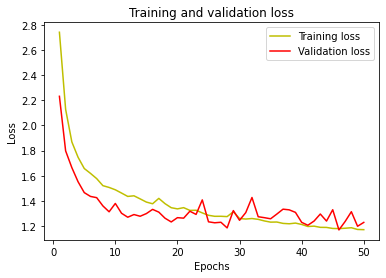

In [12]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Ploting the training accuracy vs validation accuracy

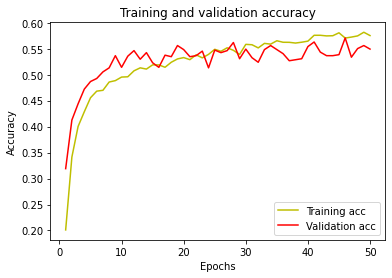

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

fatal: could not read Username for 'https://github.com': No such device or address
